# Working with Together AI in Pixeltable

### Prerequisites

- A Together AI account with an API key (https://api.together.ai/settings/api-keys)

### Important notes

- Together.ai usage may incur costs based on your Together.ai plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter your Together API key.

In [ ]:
%pip install -qU pixeltable together

In [ ]:
import getpass
import os

if 'TOGETHER_API_KEY' not in os.environ:
    os.environ['TOGETHER_API_KEY'] = getpass.getpass('Together API Key: ')

Now let's create a Pixeltable directory to hold the tables for our demo.

In [1]:
import pixeltable as pxt

# Remove the 'together_demo' directory and its contents, if it exists
pxt.drop_dir('together_demo', force=True)
pxt.create_dir('together_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory 'together_demo'.


## Chat completions

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from OpenAI.

In [2]:
from pixeltable.functions import together

chat_t = pxt.create_table('together_demo/chat', {'input': pxt.String})

messages = [{'role': 'user', 'content': chat_t.input}]

chat_t.add_computed_column(
    output=together.chat_completions(
        messages=messages,
        model='meta-llama/Llama-3.3-70B-Instruct-Turbo',
        model_kwargs={
            # Optional dict with parameters for the Together API
            'max_tokens': 300,
            'stop': ['\n'],
            'temperature': 0.7,
            'top_p': 0.9,
        },
    )
)
chat_t.add_computed_column(
    response=chat_t.output.choices[0].message.content
)

Created table 'chat'.
Added 0 column values with 0 errors in 0.01 s
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [3]:
# Start a conversation
chat_t.insert(
    [
        {'input': 'How many species of felids have been classified?'},
        {'input': 'Can you make me a coffee?'},
    ]
)
chat_t.select(chat_t.input, chat_t.response).head()

Inserted 2 rows with 0 errors in 1.58 s (1.27 rows/s)


input,response
How many species of felids have been classified?,"There are 40 species of felids that have been classified. These include big cats like lions, tigers, leopards, and jaguars, as well as smaller wild cats like lynxes, ocelots, and servals. The classification of felids is as follows:"
Can you make me a coffee?,"I'm happy to help, but I'm a large language model, I don't have the capability to physically make you a coffee. I exist solely in the digital realm and don't have a physical presence. However, I can guide you through the process of making a coffee if you'd like! What type of coffee would you like to make? Drip, French press, espresso, or something else?"


## Embeddings

In [4]:
emb_t = pxt.create_table(
    'together_demo/embeddings', {'input': pxt.String}
)
emb_t.add_computed_column(
    embedding=together.embeddings(
        input=emb_t.input, model='BAAI/bge-base-en-v1.5'
    )
)

Created table 'embeddings'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [5]:
emb_t.insert(
    [{'input': 'Together AI provides a variety of embeddings models.'}]
)

Inserted 1 row with 0 errors in 0.54 s (1.86 rows/s)


1 row inserted.

In [6]:
emb_t.head()

input,embedding
Together AI provides a variety of embeddings models.,[ 0.005 -0.022 0.018 0.051 0.033 -0.007 ... -0.029 0.012 0.059 -0.022 0.044 0.001]


## Image generations

In [7]:
image_t = pxt.create_table('together_demo/images', {'input': pxt.String})
image_t.add_computed_column(
    img=together.image_generations(
        image_t.input,
        model='black-forest-labs/FLUX.1-schnell',
        model_kwargs={'steps': 5},
    )
)

Created table 'images'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [8]:
image_t.insert(
    [{'input': 'A friendly dinosaur playing tennis in a cornfield'}]
)

Inserted 1 row with 0 errors in 1.35 s (0.74 rows/s)


1 row inserted.

In [9]:
image_t

table 'together_demo/images'

 Column Name    Type                                      Computed With
       input  String                                                   
         img   Image  image_generations(input, model='black-forest-l...

input,img
A friendly dinosaur playing tennis in a cornfield,

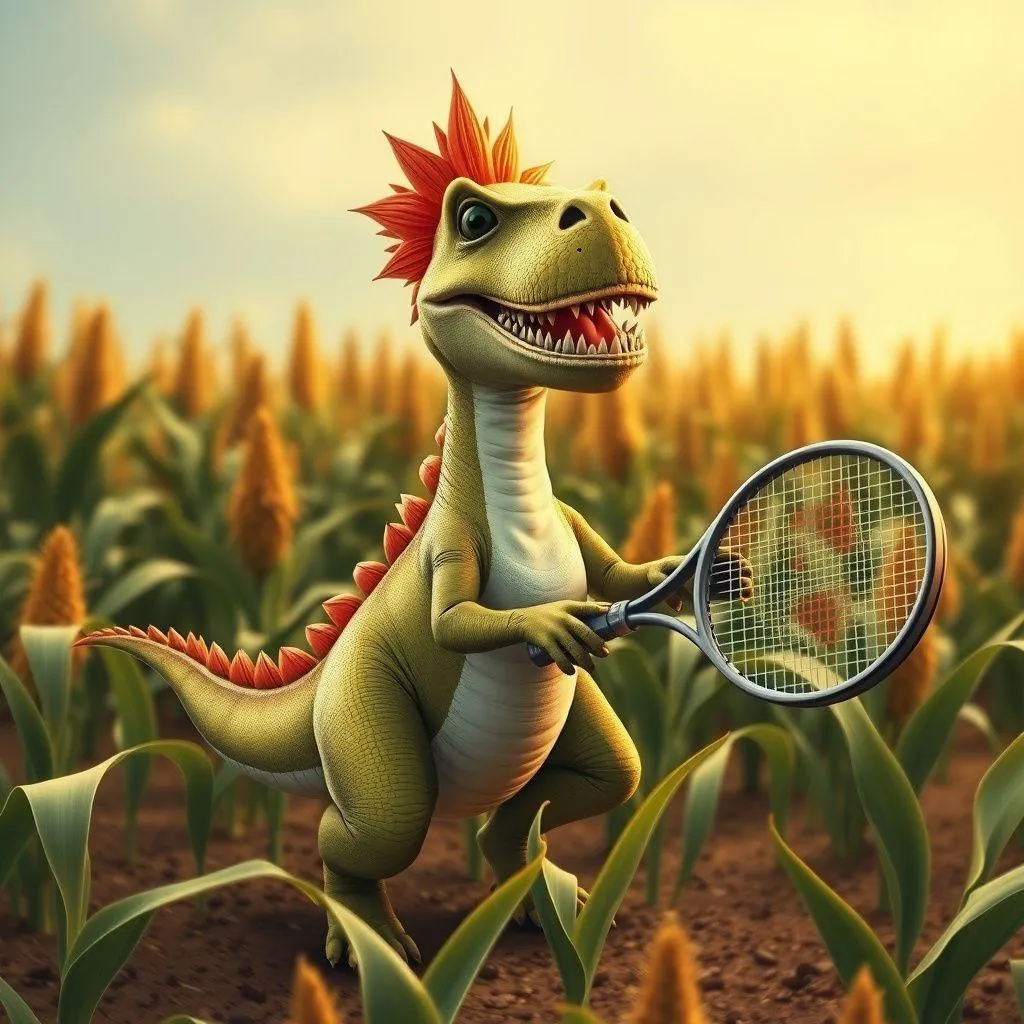

In [10]:
image_t.head()

### Learn more

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://docs.pixeltable.com/howto/use-cases/rag-operations) tutorial.

If you have any questions, don't hesitate to reach out.